<H1>Multivariate regression</H1>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
#mypath = '/fs3/group/jonasgrp/MachineLearning/Cell_types.xlsx'
mypath = './Cell_types.xlsx'
df = pd.read_excel(io=mypath, sheetname='PFC', skiprows=1)

In [4]:
df.head()

,CellID,Vrest,InputR,Sag,Tau_mb,MaxAPfreq,Temp,Strain,Weight,Age,Gender,AP_peak,AP_thr,AP_maxrise,AP_t50,rheobase
0,16.08.30.0.5,-64.8039,123.611,1.31594,21.766200,5,24.6,CB57BL,23.1,56,male,69.1071,-42.8009,170.2880,1.53888,150.0
1,16.08.31.0.6,-74.9081,152.837,1.17876,23.242900,17,22.4,CB57BL,24.6,57,male,79.8796,-46.7987,180.0540,2.03427,150.0
2,16.08.31.1.2,-74.4443,221.895,1.17550,27.983400,7,22.4,CB57BL,24.6,58,male,89.9048,-42.7856,292.9690,1.37136,100.0
3,16.09.01.0.1,-75.8549,294.484,1.10705,31.245583,29,22.5,CB57BL,26.0,58,female,74.4971,-48.0499,116.5570,1.64910,50.0
4,16.09.01.0.2,-66.3612,271.674,1.06450,34.679290,25,22.7,CB57BL,26.0,58,female,51.8799,-44.3420,79.9561,3.24711,50.0


In [28]:
df.columns

Index([u'CellID', u'Vrest', u'InputR', u'Sag', u'Tau_mb', u'MaxAPfreq',
       u'Temp', u'Strain', u'Weight', u'Age', u'Gender', u'AP_peak', u'AP_thr',
       u'AP_maxrise', u'AP_t50', u'rheobase'],
      dtype='object')

In [43]:
df['CellID']

0     16.08.30.0.5
1     16.08.31.0.6
2     16.08.31.1.2
3     16.09.01.0.1
4     16.09.01.0.2
5     16.09.02.0.1
6     16.09.02.0.2
7     16.09.05.0.1
8     16.09.06.0.1
9     16.09.07.1.2
10    16.09.08.0.6
Name: CellID, dtype: object

In [44]:
for key in df.columns:
    if df[key].dtype != object:
        print"%-10s = %2.4f + %2.4f" %(key ,df[key].mean(), df[key].std())


Vrest      = -70.6555 + 6.1597
InputR     = 159.5803 + 75.5180
Sag        = 1.1185 + 0.0837
Tau_mb     = 25.0577 + 6.0168
MaxAPfreq  = 21.2727 + 16.5112
Temp       = 22.6545 + 0.6684
Weight     = 24.4273 + 2.3247
Age        = 58.4545 + 1.8635
AP_peak    = 74.5126 + 13.0963
AP_thr     = -44.1963 + 3.5003
AP_maxrise = 190.7669 + 100.7428
AP_t50     = 2.0168 + 0.7596
rheobase   = 153.1835 + 99.6540


In [51]:
means = df[ df.columns ].mean()
means 

Vrest         -70.655473
InputR        159.580327
Sag             1.118492
Tau_mb         25.057726
MaxAPfreq      21.272727
Temp           22.654545
Weight         24.427273
Age            58.454545
AP_peak        74.512618
AP_thr        -44.196282
AP_maxrise    190.766864
AP_t50          2.016752
rheobase      153.183545
dtype: float64

In [54]:
df_means = pd.DataFrame(means).T
df_means.head()

,Vrest,InputR,Sag,Tau_mb,MaxAPfreq,Temp,Weight,Age,AP_peak,AP_thr,AP_maxrise,AP_t50,rheobase
0,-70.655473,159.580327,1.118492,25.057726,21.272727,22.654545,24.427273,58.454545,74.512618,-44.196282,190.766864,2.016752,153.183545


In [55]:
df.InputR

0     123.6110
1     152.8370
2     221.8950
3     294.4840
4     271.6740
5     137.2340
6      69.2104
7      97.5294
8     190.6990
9      97.8774
10     98.3324
Name: InputR, dtype: float64

In [56]:
df['Vrest'].mean()

-70.655472727272709

In [57]:
df['Vrest'].unique() # get NumPy array

array([-64.8039, -74.9081, -74.4443, -75.8549, -66.3612, -68.7208,
       -66.2903, -60.4436, -78.7849, -78.7819, -67.8163])

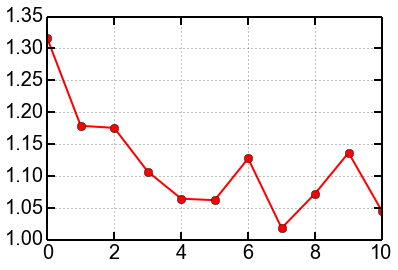

In [58]:
df['Sag'].plot(marker='o', color='red'); # plots

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


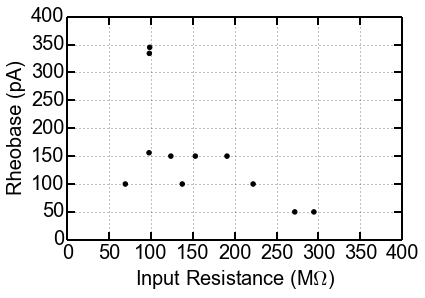

In [59]:
plt.scatter(df['InputR'], df['rheobase'], color='black')
plt.xlabel('Input Resistance (M$\Omega$)'), plt.ylabel('Rheobase (pA)')
plt.xlim(0,400), plt.ylim(0,400);

Let's evaluate how much the membrane potential depends on Input resistance and 
membrane time constant and the sag ratio. We will create the following multivariate function:

$f(k;x) = k_0 + k_1x_1 + k_2x_2 + k_3x_3$

where $k$ is a vector or parameters (contants) and $x$ is a vector of independent variables (i.e $x_1$ is the input resistance $x_2$ is membrane time constant and $x_3$ the sag ratio)

In [60]:
x = df[['InputR', 'Sag','Tau_mb']]
y = df[['Vrest']]

In [61]:
# import standard regression models (sm)
import statsmodels.api as sm 

In [62]:
K = sm.add_constant(x) # k0, k1, k2 and k3...

In [63]:
# get estimation
est = sm.OLS(y, K).fit() # ordinary least square regression

In [64]:
est.summary() # need more data for kurtosis :)

/usr/lib/python2.7/dist-packages/scipy/stats/stats.py:1293: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Vrest   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     1.449
Date:                Thu, 08 Sep 2016   Prob (F-statistic):              0.308
Time:                        23:44:21   Log-Likelihood:                -32.425
No. Observations:                  11   AIC:                             72.85
Df Residuals:                       7   BIC:                             74.44
Df Model:                           3                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -41.7967     26.346     -1.586      0.157      -104.096    20.503
InputR         0.0277      0.042      0.662      0.529        -0.071     0.127
Sag          -10.1493     21.869     -0.464      0.657       -61.862    41.563
Tau_mb        -0.8753      0.526     -1.663      0.140        -2.120     0.369
==============================================================================
Omnibus:                        2.496   Durbin-Watson:                   2.477
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                1.705
Skew:                           0.875   Prob(JB):                        0.426
Kurtosis:                       2.190   Cond. No.                     3.42e+03
==============================================================================

Warnings:
[1] The condition number is large, 3.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

r_squared is not very large...  but coef gives us the values of $k_0$, $k_1$, $k_2$, and $k_3$ to plug into the equation. Based on the standard error <B>InputResistance</B> and <B>mbTau</B> are more important than SagRatio to determine the resting membrane potential.